In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataPath = "data/train"

In [4]:
car = []
non_car = []
for item in os.listdir(os.path.join(dataPath, "car")): # Use os.path.join to generate paths
    img = cv2.imread(os.path.join(dataPath, "car", item)) # Read image from files
    img = cv2.resize(img, (36, 16)) # Resize the image from (360, 160) to (36, 16)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Convert image to grayscale image
    car.append(img) # Append the tuple to the dataset list

for item in os.listdir(os.path.join(dataPath, "non-car")): # Use os.path.join to generate paths
    img = cv2.imread(os.path.join(dataPath, "non-car", item)) # Read image from files
    img = cv2.resize(img, (36, 16)) # Resize the image from (360, 160) to (36, 16)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # Convert image to grayscale image
    non_car.append(img) # Append the tuple to the dataset list

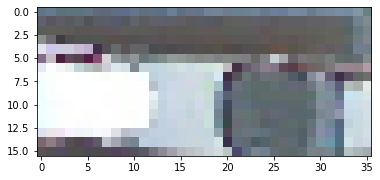

In [5]:
idx = 0
h = car[idx][:,:,0]
s = car[idx][:,:,1]
v = car[idx][:,:,2]
hist_h = cv2.calcHist([h], [0], None, [256], [0, 256])
hist_s = cv2.calcHist([s], [0], None, [256], [0, 256])
hist_v = cv2.calcHist([v], [0], None, [256], [0, 256])
plt.imshow(cv2.cvtColor(car[idx], cv2.COLOR_HSV2RGB))

56 247


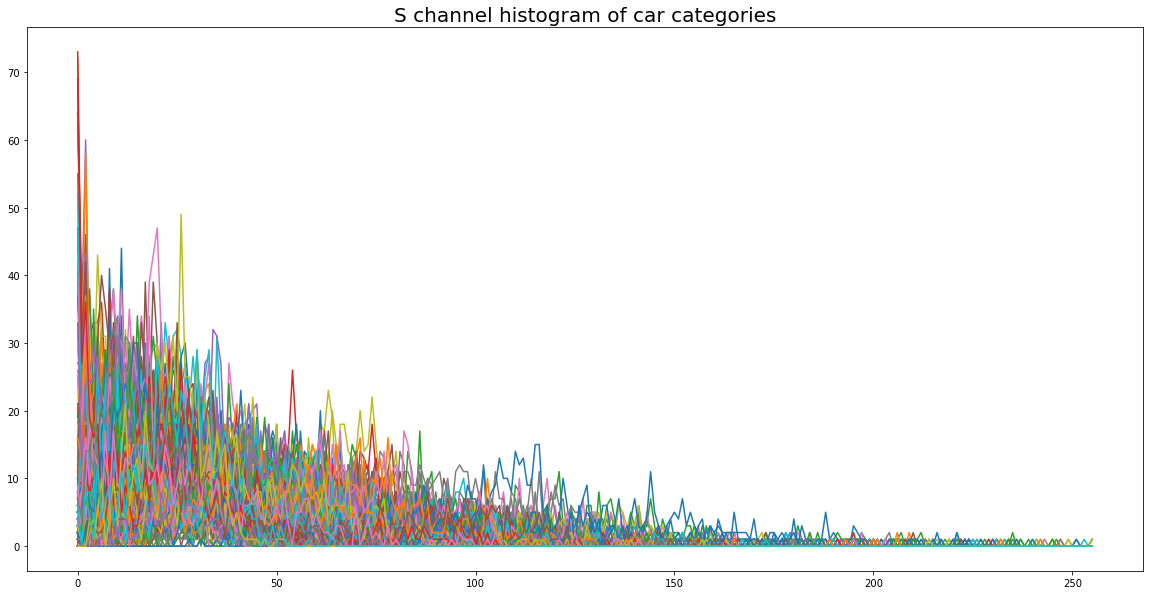

In [23]:
idx = 25
res = []
plt.figure(figsize=(20, 10))
for idx in range(300):
    h = car[idx][:,:,0]
    s = car[idx][:,:,1]
    v = car[idx][:,:,2]
    hist_h = cv2.calcHist([h], [0], None, [256], [0, 256])
    hist_s = cv2.calcHist([s], [0], None, [256], [0, 256])
    hist_v = cv2.calcHist([v], [0], None, [256], [0, 256])
    tmp = np.argmax(hist_v)
    plt.plot(hist_s)
    if tmp != 255:
        res.append(tmp)
print(np.min(res), np.max(res))
plt.title("S channel histogram of car categories", fontsize=20)
plt.savefig('S_car.png', bbox_inches='tight')
plt.show()


63 166


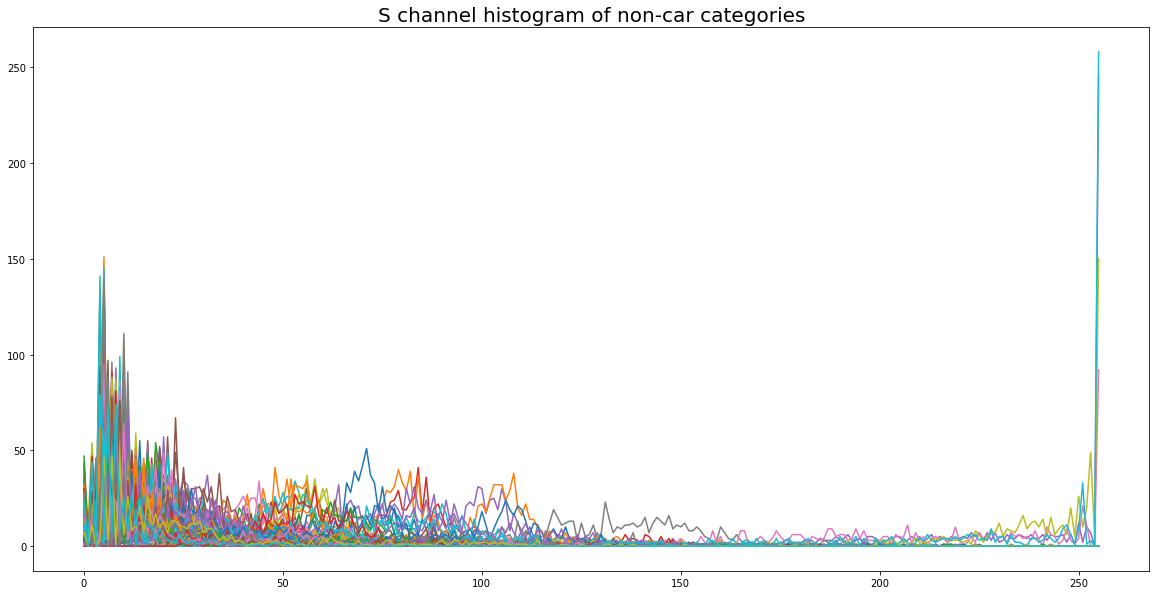

In [26]:
idx = 25
res = []
plt.figure(figsize=(20, 10))
for idx in range(300):
    h = non_car[idx][:,:,0]
    s = non_car[idx][:,:,1]
    v = non_car[idx][:,:,2]
    hist_h = cv2.calcHist([h], [0], None, [256], [0, 256])
    hist_s = cv2.calcHist([s], [0], None, [256], [0, 256])
    hist_v = cv2.calcHist([v], [0], None, [256], [0, 256])
    tmp = np.argmax(hist_v)
    plt.plot(hist_s)
    if tmp != 255:
        res.append(tmp)
print(np.min(res), np.max(res))
plt.title("S channel histogram of non-car categories", fontsize=20)
plt.savefig('S_noncar.png', bbox_inches='tight')
plt.show()


56 247


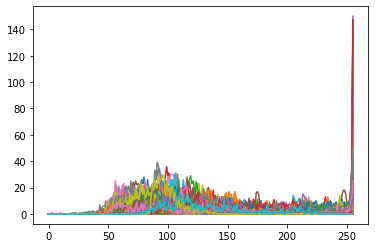

6


In [77]:
idx = 25
res = []
ans = 0
for idx in range(300):
    h = non_car[idx][:,:,0]
    s = non_car[idx][:,:,1]
    v = non_car[idx][:,:,2]
    hist_h = cv2.calcHist([h], [0], None, [256], [0, 256])
    hist_s = cv2.calcHist([s], [0], None, [256], [0, 256])
    hist_v = cv2.calcHist([v], [0], None, [256], [0, 256])
    plt.plot(hist_v)
    tmp = np.argmax(hist_v)
    if 40 <= np.argmax(hist_v) and np.argmax(hist_v) <= 160 and 30 <= np.max(hist_v):
        ans += 1
    if tmp != 255:
        res.append(tmp)
print(np.min(res), np.max(res))
plt.show()
print(ans)
# plt.imshow(cv2.cvtColor(non_car[idx], cv2.COLOR_HSV2RGB))

79.0 111


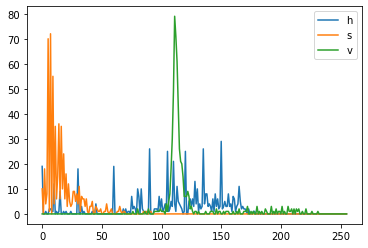

In [58]:
plt.plot(hist_h, label="h")
plt.plot(hist_s, label="s")
plt.plot(hist_v, label="v")
print(np.max(hist_v), np.argmax(hist_v))
plt.legend()
plt.show()

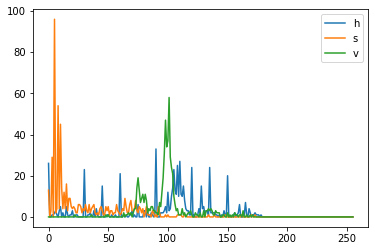

In [28]:
plt.plot(hist_h, label="h")
plt.plot(hist_s, label="s")
plt.plot(hist_v, label="v")
plt.legend()
plt.show()